## 목표
**Iris 데이터셋**에서 `Iris Setosa`와 `Iris Versicolor`를 분류하는 선형 SVM 모델을 학습하고, 결정 경계를 시각화합니다.

## 단계별 과제

### 1. 데이터 준비
1. `sklearn.datasets.load_iris`를 사용하여 데이터를 로드합니다.
2. **꽃잎 길이(Petal length)**와 **꽃잎 너비(Petal width)**를 특징(feature)으로 선택합니다.
3. `Iris Setosa`와 `Iris Versicolor` 클래스만 선택합니다.
#### 예상 출력 결과
```
특성 이름: ['petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa', 'versicolor']
데이터 크기: (100, 2)
```

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)
feature_name = iris.feature_names[2:]
target_name = iris.target_names[:2]
X = iris.data[feature_name].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

print(f"특성이름: {feature_name}")
print(f"타깃이름: {target_name}")
print(f"데이터 크기: {X.shape}")

특성이름: ['petal length (cm)', 'petal width (cm)']
타깃이름: ['setosa' 'versicolor']
데이터 크기: (100, 2)


### 2. 모델 학습
1. `SVC(kernel="linear")`를 사용하여 선형 SVM 모델을 정의합니다.
2. 모델을 학습시키고, 학습된 모델의 **지원 벡터(Support Vectors)**를 출력합니다.
#### 예상 출력 결과
```
지원 벡터(Support Vectors):
[[1.9 0.4]
 [3.  1.1]]
```

In [ ]:
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
print("지원 벡터(Support Vectors):")
print(svm_clf.support_vectors_)

지원 벡터(Support Vectors):
[[1.9 0.4]
 [3.  1.1]]


### 3. 결정 경계 시각화
1. **matplotlib**를 사용하여 데이터를 산점도로 시각화합니다.
2. 선형 SVM의 결정 경계와 마진을 플롯합니다.

<img width="599" alt="스크린샷 2024-11-25 오후 8 16 15" src="https://github.com/user-attachments/assets/e7d30471-b062-4f10-be50-e4a0a474549d">

위의 출력 결과를 보고 코드를 작성해주세요.

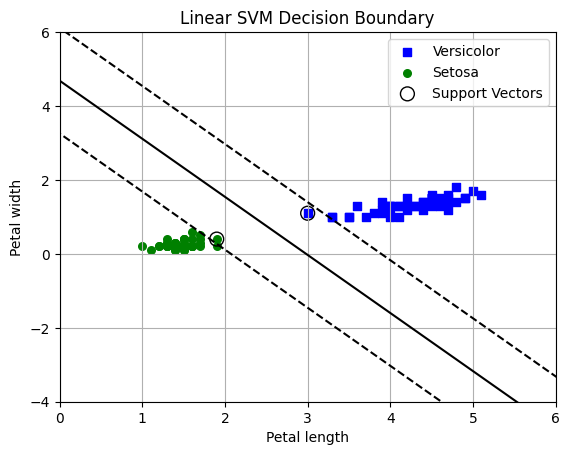

In [ ]:
#전처리
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x_plot = np.linspace(-0.5, 6.5, 100)
decision_boundary = -(w[0] / w[1]) * x_plot - b / w[1]
margin_positive = decision_boundary + 1 / w[1]
margin_negative = decision_boundary - 1 / w[1]

# 데이터를 산점도로 시각화
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Versicolor', c = 'b', marker = 's', s=30)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Setosa', c = 'g', s=30)

# 선형 SVM의 결정 경계와 마진 플롯
plt.plot(x_plot, decision_boundary, 'k-')
plt.plot(x_plot, margin_positive, 'k--')
plt.plot(x_plot, margin_negative, 'k--')

# 지원 벡터 그리기
plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# x축과 y축 범위 설정
plt.xlim([0, 6])
plt.ylim([-4, 6])

# 그래프 그리기
plt.title('Linear SVM Decision Boundary')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid()
plt.legend()
plt.show()